# Introduction to Plotting with Seaborn

**IN PROGRESS - FINAL VERSION TO BE PUBLISHED SEPT 29, 2021**

## Learning Objectives
- Be familiar with the use-cases for Seaborn plots
- Generate a varity of plots in Seaborn useful for EDA
- Recognize and appropriately use strategies for visualizing continuous versus categorical data
- Appropriately plot nested data

---

## Introduction

[Seaborn](https://seaborn.pydata.org) is a great Python plotting package that is built on top of Matplotlib. That is, it uses Matplotlib "under the hood", but it offers the user a much simpler API (set of commands) that enable us to generate a variety of great-looking plots that are particularly useful in data science. You can check out Seaboarn's [examples gallery](https://seaborn.pydata.org/examples/index.html) to see some of the cool stuff you can do (including plotting neuroscience data!). Seaborn was written by [Michael Waskom](https://mwaskom.github.io/).

Comparing Seaborn to Matplotlib, you could say that Matplotlib givens you every sharp, hard-to-use tool in the shed, and you have to figure out how to learn them all without chopping off a finger. Fortunatley in data science you aren't likely to lose any fingers, but Seaborn gives you some DIY-friendly power tools to get data science jobs done easily and looking great. 




## Overview of Seaborn Plotting Functions

Seaborn is organized into three categories of plot types, as shown below:

<img src=https://seaborn.pydata.org/_images/function_overview_8_0.png  alt='Seaborn overview' width=500>

*Image source: [seaborn.pydata.org](seaborn.pydata.org)*

You can see that Seaborn's functions are organized around the different types of data, and questions we typically ask of data in data science: the `relpolt` function plots relationships between different (continuous) variables; the `displot` function plots distributions of data (such as histograms), and the`catplot` function.


## Importing the Seaborn package

By convention, the alias we use when importing Seaborn is `sns`.

We'll also be using some other packages, so we'll import those packages at the same time.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob

## Plotting Gapminder data

Mostly we'll work with long-format data from here on, but since we have worked with the Gapminder data up until now, let's see how we can generate a plot similar to what we produced in the [Introduction to Plotting with Matplotlib](./plotting) lesson.

First we'll load the Ocieania GDP data, and strip the leading text off column names so that they are just the years:

In [12]:
df = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
df.columns = df.columns.str.strip('gdpPercap_')

In the previous lesson, we plotted GDP for each country as a function of year. That is, year is on the *x* axis, GDP is on the *y* axis, and there are separate lines for each country. As discussed previously, in this dataset, year is a continuous variable, as is GDP, but country is a categorical variable. 

From the figure of Seaborn plot types above, you can see that `relplot()` is the function to use for relational plots — that is, when you want to show the relationships between two continuous variables (year and GDP in this case).

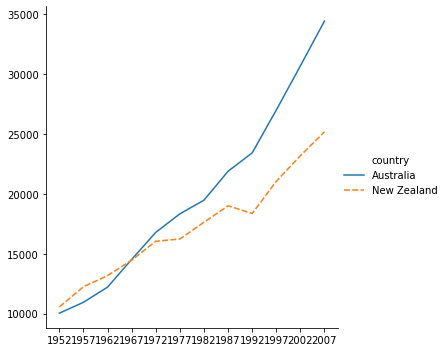

In [13]:
sns.relplot(data=df.T, kind='line')  # For wide-format data we need to transpose rows & columns
plt.show() # Always good practice to have this as the last line in a plotting cell

### Plotting Long-Format Data

Let's move to working some some data of the sort we might find in cognitive psychology. Imagine a simple **lexical decision task**, an experiment in which each trial involves presenting a printed string of letters to a participant, and asking them to make a response as quickly as possible: pressing one button of the word is a real word in their native language, and another button if it is not a real word. The dependent variable in the experiment is reation time (RT) — the amount of time that passed between the onset of the word on the screen, and the button press.

Lexical decision tasks are commonly used in psycholinguistics to explore properties of the real words, such as their length or how frequently they occur in normal usage. However, for our simple example, we'll focus on the simpler fact that, on average, people are slower in responding to nonwords than real words (especially if the nonwords look plausibly like real words, for example words like *blorp* or *furtle* that follow English word formation patterns).

We've created some data, using a random number generator, to use in our plotting examples. The data were deliberately created with certain properties, so that the expected difference between RTs. We have data from 5 hypothetical participants, stored in separate data files in the `data` folder. The naming format for the files is `ldt_sXX_data.csv`, where `XX` stands for the subject ID number (two digits).

First we'll load the data from the files, practcing our [list comprehension](../3/looping-data-files), and storing the result in a pandas DataFrame called `df`:

In [14]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('data/ldt_s??_data.csv')])

Let's look at a sample of the data:

In [15]:
df.sample(10)

,ID,condition,RT
14,ldt_s01,word,0.594508
7,ldt_s04,word,0.629895
45,ldt_s02,nonword,0.579624
37,ldt_s02,nonword,0.820527
25,ldt_s03,nonword,0.855808
46,ldt_s01,nonword,0.909337
18,ldt_s02,word,0.402575
40,ldt_s05,nonword,0.897466
30,ldt_s03,nonword,0.764681
3,ldt_s01,word,0.470913


We can see that there are three columns:
- `ID` is the unique participant identifier
- `condition` is the type of word (real or nonword)
- `RT` is reaction time, measured in seconds

## Descriptive statistics

We can use the pandas `.describe()` method to examine some basic properties of our data:

In [18]:
df.describe()

,RT
count,250.000000
mean,0.670811
std,0.177410
min,0.292526
25%,0.536520
50%,0.654281
75%,0.798783
max,1.144543


Since `RT` is the only continuous variable in this DataFrame, we only get descriptive statistics for this variable.

## Examining distributions with histograms

**Histograms** are a type of plot that allows us to view distributions of values. The *x* axis of a histogram represents the values in the data, and the *y* axis shows the count of how many trials had that value on the *x* axis. Values on the *x* axis are grouped into *bins* — ranges of values. 

In Seaborn, we use the `displot()` function to plot distributions. Histograms are one type of `displot`, but they are the default, so we can just run the following:

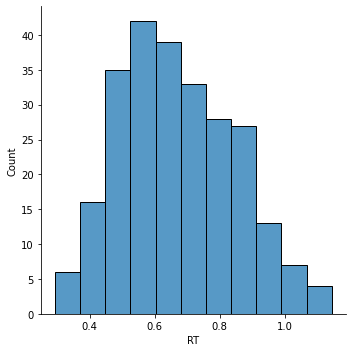

In [17]:
sns.displot(data=df, x='RT')
plt.show()

Comparing the range of values on the *x* axis with the `min` and `max` values from `df.describe()`, we see that the entire range of values is represented. The range of RT values have been binned into 11 categories, in order to draw the 11 bars in the histogram. We can see that the most common values of RT are between approximately 0.5 – 0.6 s, which corresponds to the median (`50%`) value shown by `pd.describe()`. We can also see that the data are slightly *skewed* — there is a wider range of values to the right than the left of the peak. Visualizing distributions is thus a useful way of examining your data, and you can likely glean more information from this plot, more quickly and easily, than from the descriptive statistics table above.

An alternative form of ditribution plot in Seaborn is the *kernel density estimate* (`kde`; often more simply called a "density plot"). This is like a histogram, but plots smooth curves over the range of values rather than bins as bars. To override `displot()`'s deafult of plotting a histogram, we add a `kind` kwarg: 

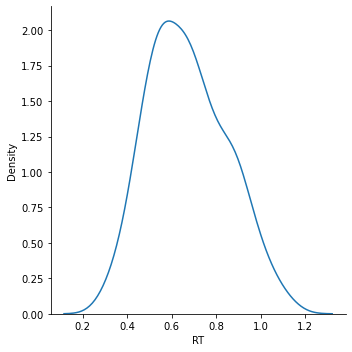

In [20]:
sns.displot(kind='kde',
           data=df, x='RT')
plt.show()

Density plots arguably make more sense for continuous variables like reaction time, since they represent continuous variables in a more continuous fashion. 

## Viewing the data by condition

As noted, the experiment had two conditions, words and nonwords. So far we've looked at the data overall, combining RTs from those two conditions. But it's easy to look at the data broken down by condition. 

Firstly, we can use pandas' `.groupby()` method to get descriptive statistics:

In [21]:
df.groupby('condition').describe()

RT                                                              \
           count      mean       std       min       25%       50%       75%   
condition                                                                      
nonword    125.0  0.800641  0.136956  0.463290  0.694638  0.791886  0.897466   
word       125.0  0.540981  0.102284  0.292526  0.466358  0.549472  0.605592   

                     
                max  
condition            
nonword    1.144543  
word       0.801082

We can add a `hue` kwarg to `sns.displot()` to separate and colour-code the conditions in a histogram:

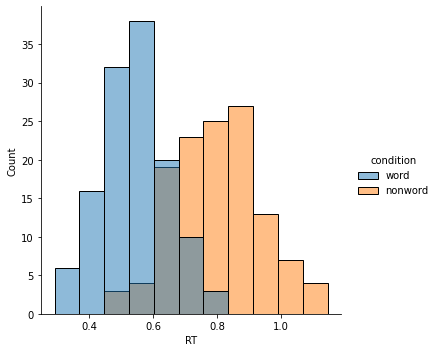

In [24]:
sns.displot(data=df, x='RT', hue='condition')
plt.show()

The grey area in the plot represents overlap.

We can likewise use the `hue` kwarg with `kde` plots:

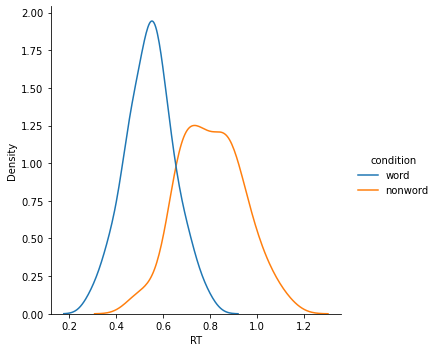

In [26]:
sns.displot(kind='kde',
           data=df,
           x='RT', hue='condition')
plt.show()